In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

In [2]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)

In [90]:
n = 200
prob1 = logspace(-3.0,0.0,n)
prob3 = logspace(-3.0,0.0,n)
beta = zeros(shape=(n,n))
fehmean = zeros(shape=(n,n))
vphimean = zeros(shape=(n,n))
nstars = zeros(shape=(n,n))
for i in range(0,n):
    for j in range(0,n):
        imod = (Ps[:,0]<prob1[j])&(Ps[:,2]<prob3[i])
        df2 = df.loc[imod]
        sigr = std(df2.GalRVel)
        sigphi = std(df2.GalphiVel)
        sigz = std(df2.GalzVel)
        beta[i,j] = 1.0-(sigz**2.0+sigphi**2.0)/(2*sigr**2.0)
        fehmean[i,j] = mean(df2.feh)
        vphimean[i,j] = mean(df2.GalphiVel)
        nstars[i,j] = sum(imod)*1.0
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


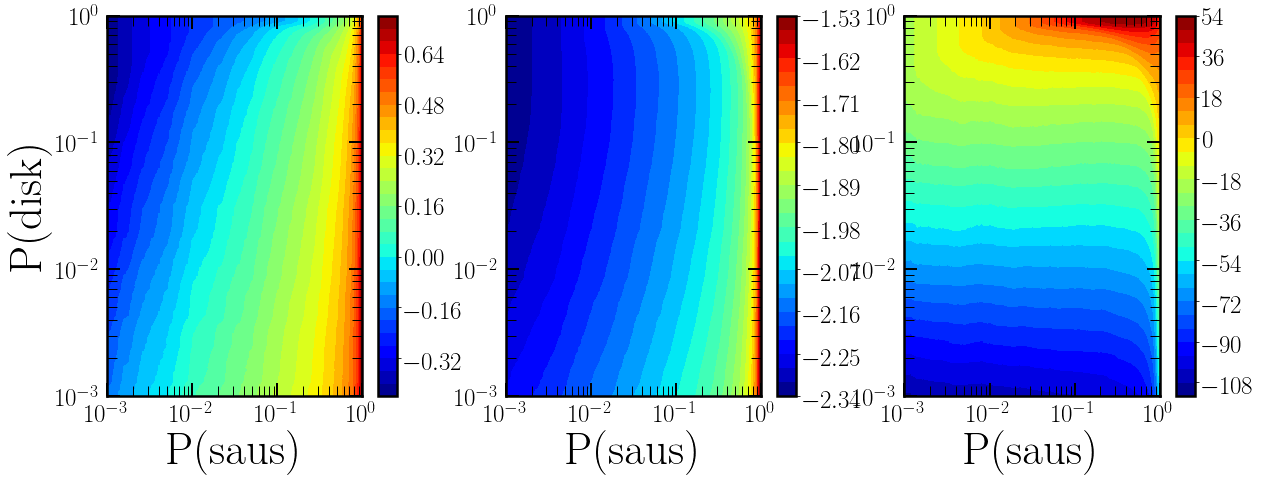

In [91]:
fig,ax1,ax2,ax3 = MyTriplePlot('P(saus)','P(disk)','P(saus)','','P(saus)','')

ax1.set_xlim([prob1[0],prob1[-1]])
ax2.set_xlim([prob1[0],prob1[-1]])
ax3.set_xlim([prob1[0],prob1[-1]])

ax1.set_ylim([prob3[0],prob3[-1]])
ax2.set_ylim([prob3[0],prob3[-1]])
ax3.set_ylim([prob3[0],prob3[-1]])

plt.sca(ax1)
plt.contourf(prob1,prob3,beta,30,cmap=cm.jet)
plt.colorbar()

plt.sca(ax2)
plt.contourf(prob1,prob3,fehmean,30,cmap=cm.jet)
plt.colorbar()

plt.sca(ax3)
plt.contourf(prob1,prob3,vphimean,30,cmap=cm.jet)
plt.colorbar()

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xscale('log')


plt.show()

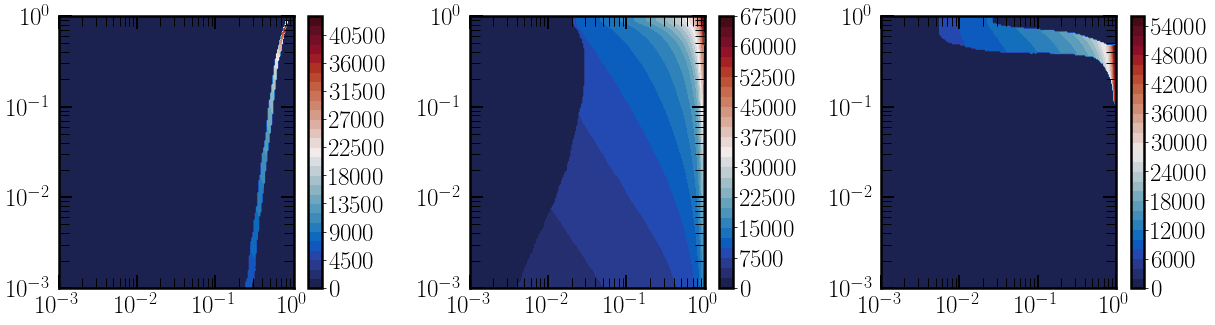

In [92]:
fig,ax1,ax2,ax3 = MyTriplePlot(size_y=5,wspace=0.4)

ax1.set_xlim([prob1[0],prob1[-1]])
ax2.set_xlim([prob1[0],prob1[-1]])
ax3.set_xlim([prob1[0],prob1[-1]])

ax1.set_ylim([prob3[0],prob3[-1]])
ax2.set_ylim([prob3[0],prob3[-1]])
ax3.set_ylim([prob3[0],prob3[-1]])


beta_halo = 1.0-(covs[1,1,1]+covs[1,2,2])/(2*covs[1,0,0])
feh_halo = meens[1,3]
vphi_halo = meens[1,1]

vphi_cond = (abs(vphimean-vphi_halo)<10.0)
feh_cond = (abs(fehmean-feh_halo)<0.3)
beta_cond = (abs(beta-beta_halo)<0.01)
cond = vphi_cond*feh_cond*beta_cond


plt.sca(ax1)
plt.contourf(prob1,prob3,beta_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

plt.sca(ax2)
plt.contourf(prob1,prob3,feh_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

plt.sca(ax3)
plt.contourf(prob1,prob3,vphi_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xscale('log')


plt.show()

saus prob =  0.6826071834272386 disk prob =  0.4347013158125022


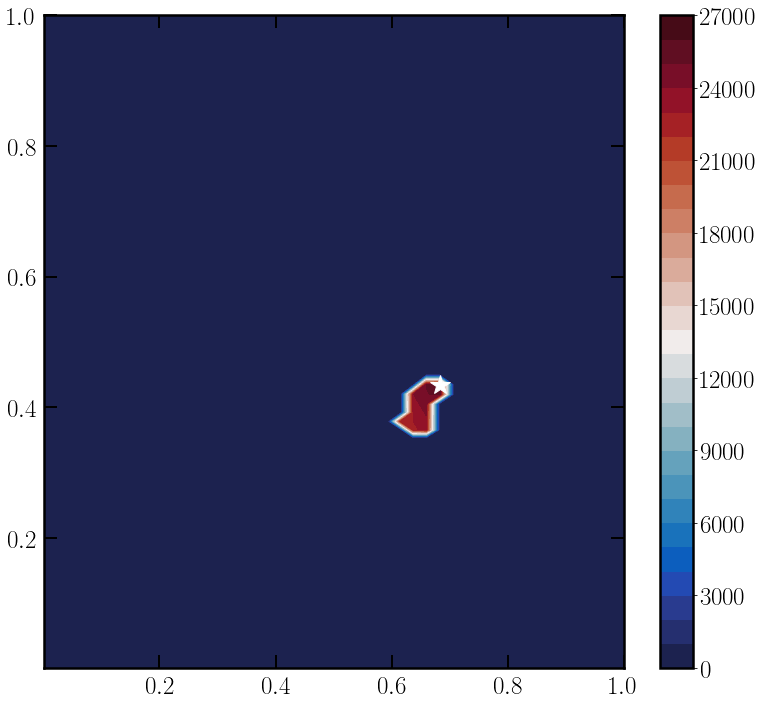

In [128]:
fig,ax1 = MySquarePlot()

ax1.set_xlim([prob1[0],prob1[-1]])
ax1.set_ylim([prob3[0],prob3[-1]])

vphi_cond = (abs(vphimean-vphi_halo)<5.0)
feh_cond = (abs(fehmean-feh_halo)<0.1)
beta_cond = (abs(beta-beta_halo)<0.01)
cond = vphi_cond*feh_cond*beta_cond

N = vphi_cond*feh_cond*beta_cond*nstars

plt.sca(ax1)
plt.contourf(prob1,prob3,N,30,cmap=cmocean.cm.balance)
plt.colorbar()

imax,jmax = unravel_index(argmax(N),(n,n))
ax1.plot(prob1[jmax],prob3[imax],'w*',markersize=20)

#ax1.set_yscale('log')
#ax1.set_xscale('log')

print('saus prob = ',prob1[jmax],'disk prob = ',prob3[imax])

plt.show()

In [571]:
#df_shardsless = pandas.read_csv('../data/Gaia-SDSS.csv')
shards_ix = []
ids = []
for i in range(0,size(names)):
    namei = names[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    shards_ix = append(shards_ix,Cand_matched.index.values)
    ids = append(ids,[namei]*shape(Cand_matched)[0])
df_shardsless = df[~df.index.isin(shards_ix)]
df_S_full = df.loc[shards_ix,:]
df_S_full['group_id'] = ids
df_S_full = df_S_full.reset_index()

In [174]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df_shardsless.GalRVel,df_shardsless.GalphiVel,df_shardsless.GalzVel,df_shardsless.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)



print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))

print(ws)

Sausage
-8.66 ± 157.65
25.46 ± 60.78
0.43 ± 80.92
-1.39 ± 0.23
[[157.64991266  -0.          60.81107583   0.7231372 ]
 [ -0.          60.78276629  -0.          -0.        ]
 [ 60.81107583  -0.          80.91507766   0.54852579]
 [  0.7231372   -0.           0.54852579   0.23342595]]

Halo
1.10 ± 143.10
7.66 ± 116.64
8.32 ± 109.28
-1.90 ± 0.40
[[143.10114846  -0.          42.58322438   1.30630163]
 [ -0.         116.63695294  -0.          -0.        ]
 [ 42.58322438  -0.         109.28391415   1.24480593]
 [  1.30630163  -0.           1.24480593   0.39853552]]

Disk
13.98 ± 74.89
132.16 ± 47.78
4.29 ± 62.11
-1.64 ± 0.26
[[74.88805795  3.52319659 28.63278783 -0.        ]
 [ 3.52319659 47.77717056 -0.          0.76110051]
 [28.63278783 -0.         62.1057096   0.28260695]
 [-0.          0.76110051  0.28260695  0.26486135]]
[0.51368261 0.33540364 0.15091375]


In [151]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)



print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")

print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))

print(ws)

Sausage
-8.17 ± 158.93
25.72 ± 61.50
0.99 ± 80.86
-1.39 ± 0.23
[[158.93219583  -0.          61.64547998   0.64040058]
 [ -0.          61.50275912  -0.          -0.        ]
 [ 61.64547998  -0.          80.86372702   0.47118498]
 [  0.64040058  -0.           0.47118498   0.23117556]]

Halo
-0.06 ± 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.44255138  -0.          39.30495381   1.26824424]
 [ -0.         120.03195329  -0.          -0.        ]
 [ 39.30495381  -0.         115.66973437   1.30481002]
 [  1.26824424  -0.           1.30481002   0.39917568]]

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75068239 10.36023545 30.12016285 -0.        ]
 [10.36023545 50.12568937 -0.          1.24266798]
 [30.12016285 -0.         62.69161941  0.14148534]
 [-0.          1.24266798  0.14148534  0.27144356]]
[0.50899714 0.33492133 0.15608153]


In [155]:
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing

#imod = (Ps[:,1]>0.8)
imod = argmax(Ps,axis=1)
df2 = df_shardsless.loc[imod==1]

JR = log10(df2.JR.values)
Jphi = df2.Jphi.values
Jz = log10(df2.Jz.values)
E = df2.E.values
data = array([JR,Jphi,Jz,E]).T
scale = preprocessing.MinMaxScaler()
data_s = scale.fit_transform(data)

bw = 0.02
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data_s)
L = kde.score_samples(data_s)
L -= amax(L)
L *= 2.0

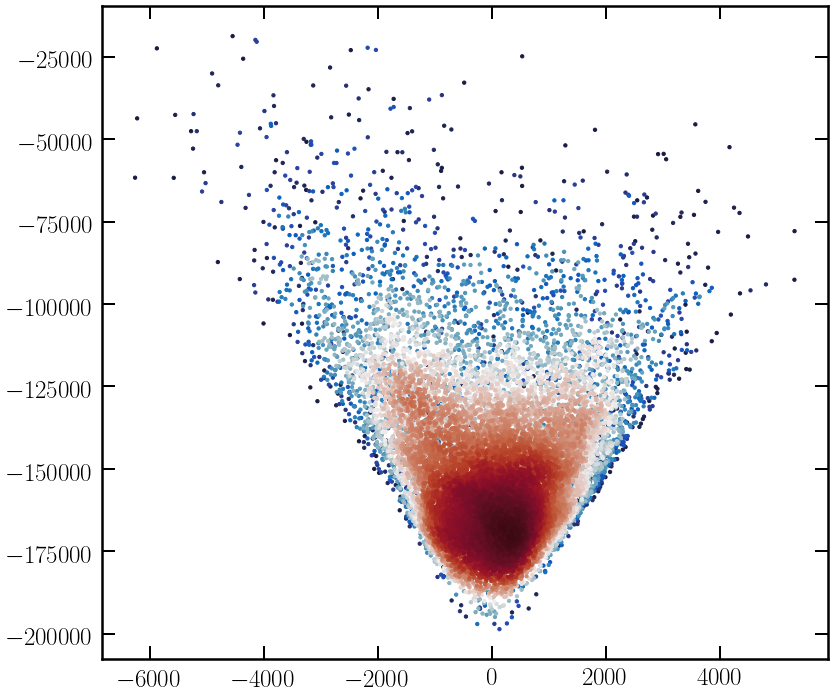

In [157]:
fig,ax1 = MySquarePlot('','')

isort = argsort(L)
ax1.scatter(Jphi[isort],E[isort],c=L[isort],s=11,rasterized=True,cmap=cmocean.cm.balance)
plt.show()


In [178]:
# Extract parts
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df_shardsless.GalRVel,df_shardsless.GalphiVel,df_shardsless.GalzVel,df_shardsless.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df_shardsless.loc[imod==0]
df2 = df_shardsless.loc[imod==1]
df3 = df_shardsless.loc[imod==2]



In [479]:
p0,e0,dens0 = PointScatter((df.Jphi).values,(df.E).values)

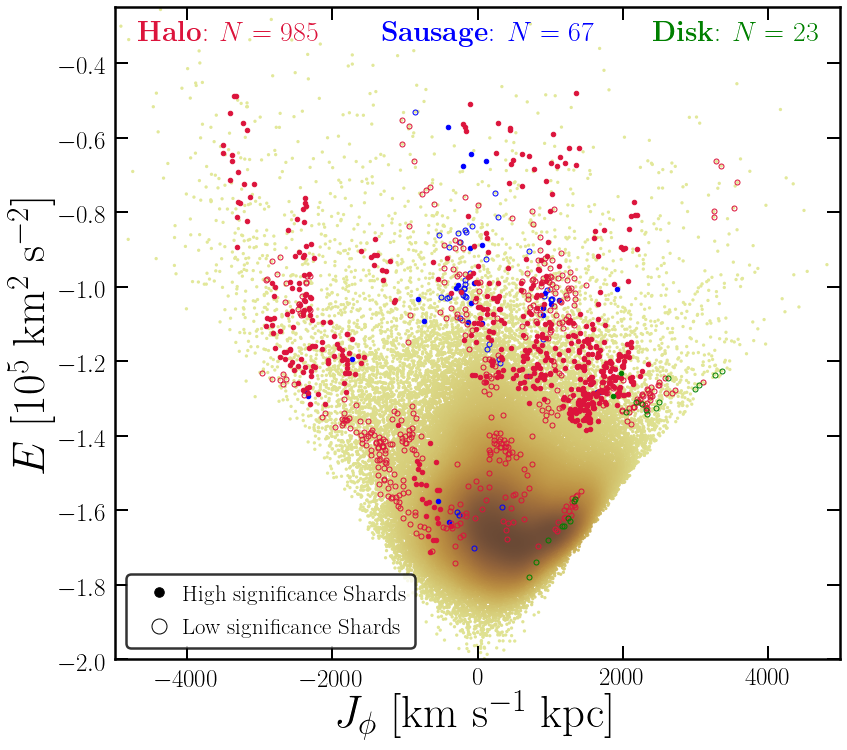

In [623]:
def datarescale(dfc,jb):
    data_sc = zeros(shape=(shape(dfc)[0],4))
    data_sc[:,0] = (log10(dfc.JR.values)-jb[0])/(jb[1]-jb[0])
    data_sc[:,1] = (dfc.Jphi.values-jb[2])/(jb[3]-jb[2])
    data_sc[:,2] = (log10(dfc.Jz.values)-jb[4])/(jb[5]-jb[4])
    data_sc[:,3] = (dfc.E.values-jb[6])/(jb[7]-jb[6])
    return data_sc

def datminmax(dfc):
    return array([amin(log10(dfc.JR.values)),amax(log10(dfc.JR.values)),\
                 amin(dfc.Jphi.values),amax(dfc.Jphi.values),\
                 amin(log10(dfc.Jz.values)),amax(log10(dfc.Jz.values)),\
                 amin(dfc.E.values),amax(dfc.E.values)])

# def datarescale(dfc,vr):
#     data_sc = zeros(shape=(shape(dfc)[0],3))
#     data_sc[:,0] = (dfc.GalRVel.values-vr[0])/(vr[1]-vr[0])
#     data_sc[:,1] = (dfc.GalphiVel.values-vr[2])/(vr[3]-vr[2])
#     data_sc[:,2] = (dfc.GalzVel.values-vr[4])/(vr[5]-vr[4])
#     return data_sc

#vr1 = array([amin(df1.GalRVel),amax(df1.GalRVel),amin(df1.GalphiVel),amax(df1.GalphiVel),amin(df1.GalzVel),amax(df1.GalzVel)])
#vr2 = array([amin(df2.GalRVel),amax(df2.GalRVel),amin(df2.GalphiVel),amax(df2.GalphiVel),amin(df2.GalzVel),amax(df2.GalzVel)])
#vr3 = array([amin(df3.GalRVel),amax(df3.GalRVel),amin(df3.GalphiVel),amax(df3.GalphiVel),amin(df3.GalzVel),amax(df3.GalzVel)])

data1 = datarescale(df1,datminmax(df1))
data2 = datarescale(df2,datminmax(df2))
data3 = datarescale(df3,datminmax(df3))

bw = 0.01

kde1 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data1)
#Lall1 = kde1.score_samples(data1)

kde2 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data2)
#Lall2 = kde2.score_samples(data2)

kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data3)
#Lall3 = kde3.score_samples(data3)


dL1 = 2*(kde1.score_samples(datarescale(df_S_full,datminmax(df1))))
dL2 = 2*(kde2.score_samples(datarescale(df_S_full,datminmax(df2))))
dL3 = 2*(kde3.score_samples(datarescale(df_S_full,datminmax(df3))))

Ps = vstack((dL1,dL2,dL3)).T
df_S1 = df_S_full.loc[argmax(Ps,axis=1)==0]
df_S2 = df_S_full.loc[argmax(Ps,axis=1)==1]
df_S3 = df_S_full.loc[argmax(Ps,axis=1)==2]

isig1 = asarray([x[0] for x in (df_S1.group_id.values)])=='N'
isig2 = asarray([x[0] for x in (df_S2.group_id.values)])=='N'
isig3 = asarray([x[0] for x in (df_S3.group_id.values)])=='N'

####
fig,ax1 = MySquarePlot('$J_\phi$ [km s$^{-1}$ kpc]',r'$E$ [$10^5$ km$^2$ s$^{-2}$]')

msz = 5
col1 = 'Blue'
col2 = 'Crimson'
col3 = 'Green'

lab1 = r'{\bf Sausage}: $N=$ '+str(shape(df_S1)[0])
lab2 = r'{\bf Halo}: $N=$ '+str(shape(df_S2)[0])
lab3 = r'{\bf Disk}: $N=$ '+str(shape(df_S3)[0])

ax1.scatter(p0,e0/1.0e5, c=dens0, s=11, edgecolor='',cmap=cmocean.cm.turbid,label=None,rasterized=True,vmin=-1e-9,vmax=2e-8)

ax1.plot(df_S1.Jphi.values[~isig1],df_S1.E.values[~isig1]/1e5,'.',color=col1,markersize=msz+4)
ax1.plot(df_S1.Jphi.values[isig1],df_S1.E.values[isig1]/1e5,'o',mec=col1,mfc='none',markersize=msz)

ax1.plot(df_S2.Jphi.values[~isig2],df_S2.E.values[~isig2]/1e5,'.',color=col2,markersize=msz+4)
ax1.plot(df_S2.Jphi.values[isig2],df_S2.E.values[isig2]/1e5,'o',mec=col2,mfc='none',markersize=msz)

ax1.plot(df_S3.Jphi.values[~isig3],df_S3.E.values[~isig3]/1e5,'.',color=col3,markersize=msz+4)
ax1.plot(df_S3.Jphi.values[isig3],df_S3.E.values[isig3]/1e5,'o',mec=col3,mfc='none',markersize=msz)

ax1.plot(-8000,0,'k.',markersize=msz+4+10,label='High significance Shards')
ax1.plot(-8000,0,'ko',markerfacecolor='none',markersize=msz+10,label='Low significance Shards')

ax1.set_xlim([-5000.0,5000.0])
ax1.set_ylim([-2.0,-0.25])

leg = ax1.legend(loc='lower left',fontsize=23,edgecolor='k',ncol=1,handletextpad=0.05)
leg.get_frame().set_linewidth(2.5)

plt.gcf().text(0.15,0.84,lab2,color=col2,fontsize=28)
plt.gcf().text(0.41,0.84,lab1,color=col1,fontsize=28)
plt.gcf().text(0.7,0.84,lab3,color=col3,fontsize=28)


plt.show()

# Save
pltname = 'ShardsStars_partitioned'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  



In [624]:
df_S3.group_id

488      Cand14
521      Cand14
685      NCand5
686      NCand5
687      NCand5
688      NCand5
827     NCand13
829     NCand13
835     NCand13
837     NCand13
839     NCand13
842     NCand13
844     NCand13
845     NCand13
846     NCand13
853     NCand14
854     NCand14
857     NCand14
867     NCand17
871     NCand17
992     NCand24
994     NCand24
1010    NCand25
Name: group_id, dtype: object

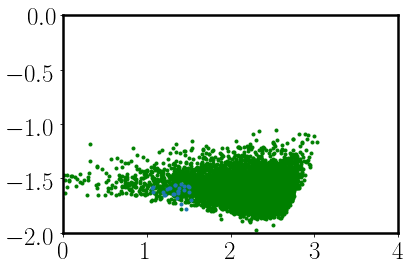

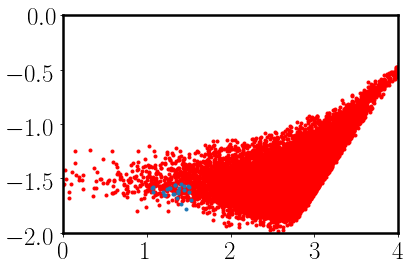

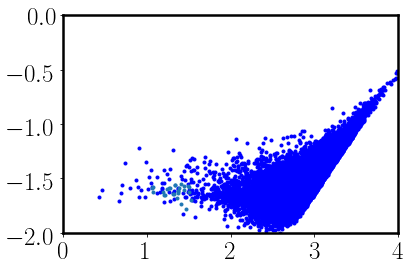

In [625]:
Cand = df_S_full.loc[df_S_full.group_id=='NCand13']
plt.plot(log10(df3.JR),df3.E/1e5,'g.')
plt.plot(log10(Cand.JR),Cand.E/1e5,'.')
plt.xlim([0.0,4.0])
plt.ylim([-2.0,0.0])
plt.show()

plt.plot(log10(df2.JR),df2.E/1e5,'r.')
plt.plot(log10(Cand.JR),Cand.E/1e5,'.')
plt.xlim([0.0,4.0])
plt.ylim([-2.0,0.0])
plt.show()

plt.plot(log10(df1.JR),df1.E/1e5,'b.')
plt.plot(log10(Cand.JR),Cand.E/1e5,'.')
plt.xlim([0.0,4.0])
plt.ylim([-2.0,0.0])
plt.show()

In [584]:
# Keep all high significance shards
halocond = argmax(Ps,axis=1)==1
#halocond[0:610] = True
df_S2 = df_S_full.loc[halocond]

# Remove substructures which lose most of their stars
df_S2_cleaned = df_S.loc[halocond]
for i in range(0,size(names)):
    nstars = shape(df_S.loc[df_S.group_id==names[i]])[0]
    nstars_h = shape(df_S2_cleaned.loc[df_S2_cleaned.group_id==names[i]])[0]
    if abs(nstars-nstars_h)/(1.0*nstars)>0.2:
        df_S2_cleaned = df_S2_cleaned[~df_S2_cleaned.group_id.isin([names[i]])]
    print(names[i],'=',nstars,'    ->    ',nstars_h,'   diff = ',nstars-nstars_h,abs(nstars-nstars_h)/(1.0*nstars))


S1 = 34     ->     34    diff =  0 0.0
S2 = 73     ->     72    diff =  1 0.0136986301369863
C2 = 22     ->     22    diff =  0 0.0
Rg1 = 20     ->     20    diff =  0 0.0
Rg2 = 20     ->     20    diff =  0 0.0
Rg3 = 16     ->     16    diff =  0 0.0
Rg4 = 13     ->     13    diff =  0 0.0
Rg5 = 29     ->     28    diff =  1 0.034482758620689655
Rg6 = 30     ->     28    diff =  2 0.06666666666666667
Rg7 = 14     ->     9    diff =  5 0.35714285714285715
Cand8 = 49     ->     44    diff =  5 0.10204081632653061
Cand9 = 44     ->     42    diff =  2 0.045454545454545456
Cand10 = 39     ->     38    diff =  1 0.02564102564102564
Cand11 = 37     ->     28    diff =  9 0.24324324324324326
Cand12 = 36     ->     20    diff =  16 0.4444444444444444
Cand13 = 36     ->     6    diff =  30 0.8333333333333334
Cand14 = 36     ->     11    diff =  25 0.6944444444444444
Cand15 = 19     ->     12    diff =  7 0.3684210526315789
Cand16 = 17     ->     7    diff =  10 0.5882352941176471
Cand17 = 14  

In [585]:
df_save = df_S2_cleaned.loc[:, ~df_S2_cleaned.columns.str.contains('^Unnamed')]
df_save = df_save.reset_index()
df_save = df_save.drop('index',axis=1)
df_save.to_csv('../data/GAIA_SDSS_Shards_HaloCleaned.csv',float_format='%.8f',index=True)

In [586]:
df_save


,group_id,ra,dec,pmra_new,pmdec_new,phot_g_mean_mag,l,b,objid,psfmag_u,...,pmb,U,V,W,GalU,GalV,GalW,GalRVel,GalTVel,GalzVel
0,S1,232.625039,49.945944,-21.862094,-13.772024,16.582559,80.840137,52.116032,1.237659e+18,17.82635,...,25.430697,-24.895670,-605.927724,-122.811353,15.678872,-353.727724,-113.433050,-71.043376,-346.874572,-113.433050
1,S1,204.590197,16.937227,-39.420067,-37.992193,17.597691,352.142436,75.114537,1.237669e+18,19.12297,...,0.798666,-102.056896,-563.983590,-57.753369,92.636660,-311.783590,-48.134544,95.744861,-310.843175,-48.134544
2,S1,31.965503,-0.471330,10.756376,-17.925362,17.610539,160.628955,-57.638223,1.237666e+18,18.84509,...,-9.184205,122.740710,-480.097035,57.399652,-132.519270,-227.897035,66.316270,-149.617870,-217.055081,66.316270
3,S1,214.891154,39.729161,-51.977563,-60.451765,16.468811,73.128471,67.809196,1.237662e+18,17.91993,...,74.213257,8.689028,-575.325648,-161.104440,-17.786141,-323.125648,-151.830775,-35.838463,-321.624215,-151.830775
4,S1,192.272822,60.015097,-12.325309,-17.753594,17.498548,123.471855,57.110694,1.237658e+18,18.58535,...,17.544260,53.606790,-524.346855,-96.281922,-62.906011,-272.146855,-87.148773,-113.571289,-255.191377,-87.148773
5,S1,192.703561,59.797768,-15.070428,-22.376861,18.925207,123.077226,57.330307,1.237655e+18,20.58232,...,22.309019,64.669978,-516.272738,-109.700769,-73.927261,-264.072738,-100.602085,-113.423365,-249.669364,-100.602085
6,S1,183.476938,0.204538,-20.057993,-31.437456,18.058173,282.882382,61.606667,1.237649e+18,19.49848,...,-36.058409,-12.222648,-585.693312,-85.077370,2.888135,-333.493312,-75.738806,63.025296,-327.496477,-75.738806
7,S1,156.547447,38.489733,-11.730064,-17.715445,17.543026,183.052675,57.685295,1.237661e+18,18.77733,...,-8.601001,-205.923798,-460.137237,-7.611539,196.346553,-207.937237,2.331234,198.971216,-205.427161,2.331234
8,S1,173.699460,0.044263,-14.304460,-17.479742,18.342116,265.580781,57.250077,1.237675e+18,19.57711,...,-22.436354,-96.807300,-562.584517,36.045382,87.094323,-310.384517,45.647364,165.920447,-276.395323,45.647364
9,S1,180.182786,0.624168,-22.583116,-27.610956,17.863855,276.170983,60.833761,1.237675e+18,19.13513,...,-34.347075,-86.895009,-585.036850,-67.650895,77.505740,-332.836850,-58.079346,139.630569,-311.914752,-58.079346


In [414]:
for namei in names[0:21]:
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    print(namei,mean(sqrt((Cand_matched.GalR)**2.0+(Cand_matched.Galz)**2.0)),mean(Cand_matched.pericentre),mean(Cand_matched.apocentre))

S1 9.543343547289533 7.8279686440376475 24.460556466647056
S2 9.78570594633818 8.692819499769014 16.995311798278873
C2 9.697138738048812 7.281375972556843 96.74543386484213
Rg1 9.628055670741427 8.745403416053158 96.7938430065158
Rg2 10.360794407678988 8.981271974963498 30.457252342389996
Rg3 10.592662167488392 7.392654916331873 39.732352931150004
Rg4 9.981106603334954 7.290343851641539 58.86583286287693
Rg5 9.02956901619215 5.667021480655713 10.15279078412143
Rg6 9.190811318201051 6.016822311565769 26.592528545973074
Rg7 10.086152047555863 4.283000327240769 47.1675812477
Cand8 10.659843291204426 8.098962509345105 22.217615479910634
Cand9 9.94264299744663 8.625560154595119 26.055437766253657
Cand10 9.368889382599374 6.634318214938685 29.755457609484218
Cand11 10.258108838349253 7.434480525361211 26.14141292462728
Cand12 11.548307932786555 6.686030242493822 24.36045062772059
Cand13 10.8318804610342 5.797673291478858 43.37632952142858
Cand14 12.242786140825666 5.694745580189999 21.946962

In [407]:
print(mean(Cand_matched.GalR),mean(Cand_matched.pericentre))

SyntaxError: invalid syntax (<ipython-input-407-3a5f402faf6e>, line 1)

In [415]:
df.columns

Index(['ra', 'dec', 'pmra', 'pmdec', 'pml', 'pmb', 'phot_g_mean_mag', 'l', 'b',
       'psfmag_u', 'psfmagerr_u', 'psfmag_g', 'psfmagerr_g', 'psfmag_r',
       'psfmagerr_r', 'psfmag_i', 'psfmagerr_i', 'psfmag_z', 'psfmagerr_z',
       'hrv_e', 'hrv', 'logg', 'logg_e', 'teff', 'teff_e', 'feh', 'feh_e',
       'helio_dist', 'X', 'Y', 'Z', 'GalR', 'Galphi', 'Galz', 'Galdist',
       'GalRecX', 'GalRecY', 'GalRecZ', 'U', 'V', 'W', 'GalU', 'GalV', 'GalW',
       'GalRVel', 'GalphiVel', 'GalzVel', 'JR', 'Jphi', 'Jz', 'E', 'apocentre',
       'pericentre', 'eccent', 'zmax', 'orb_incl', 'orb_incl_deg'],
      dtype='object')